## Qualitative analysis

This is a notebook for qualitatively analysing nuScenes samples evaluated by the two safety-metrics. To gather the data used in this analysis, the main() function of the DetectionEval class of the modified nuscenes devkit provided should be run with the save_metrics_samples parameters set to a positive amount of samples. 

In [1]:
import numpy as np
import pandas as pd
import os
import json
import random
from nuscenes import NuScenes
from PIL import Image
from visualization_helpers import * 



# Visualize for all detectors to compare
data_root ='/cluster/work/andronn/MasterThesis/MASTER/master_repo/Thesis-Evaluating-Safety-Oriented-Metrics-for-Object-Detectors/results/'
detectors = ['pointpillars-fpn/', 'regnet-regnetX_FPN/', 'ssn-REGNET/']
data_loc = [data_root+detector+'METRIC_SAMPLES/' for detector in detectors]


In [2]:
# Get sample tokens of selected samples    
with open(os.path.join(data_root, 'sample_tokens_selected.json'), 'r') as f:
    sample_tokens = json.load(f)['sample_tokens']



In [15]:
# Choose an index in the sample list to analyse
for t in sample_tokens:
    print(t)
    
print("Length: ", len(sample_tokens))
idx = int(input("Input sample index to analyze: ")) 

ec78e68b1637464da5305a9cbed214c4
28cce0b8fdb7437db096beb047179453
6c8d4379e83646d08436f6ec92b35fe5
f4a78e352cb74deca0bf4e1669aec42a
970e605b05c14027b08a6e74d5e8ceca
c35efe5eaf784275b8c7e31fb50aa902
b8849fcd11d14e499aea2ee258d8b581
d575e4dbdd6749068d4e71f7d99b02bc
645e0c2f9b724c5b95fe434930c2682a
d056b9bdd56f44669540c6c323042d30
c752fd12565d48d598a8bfce5b0530ad
Length:  11
Input sample index to analyze: 7


**Below we visualize the sample in question and the birds-eye Ground Truths (green) and Predictions (blue):**

Sample:


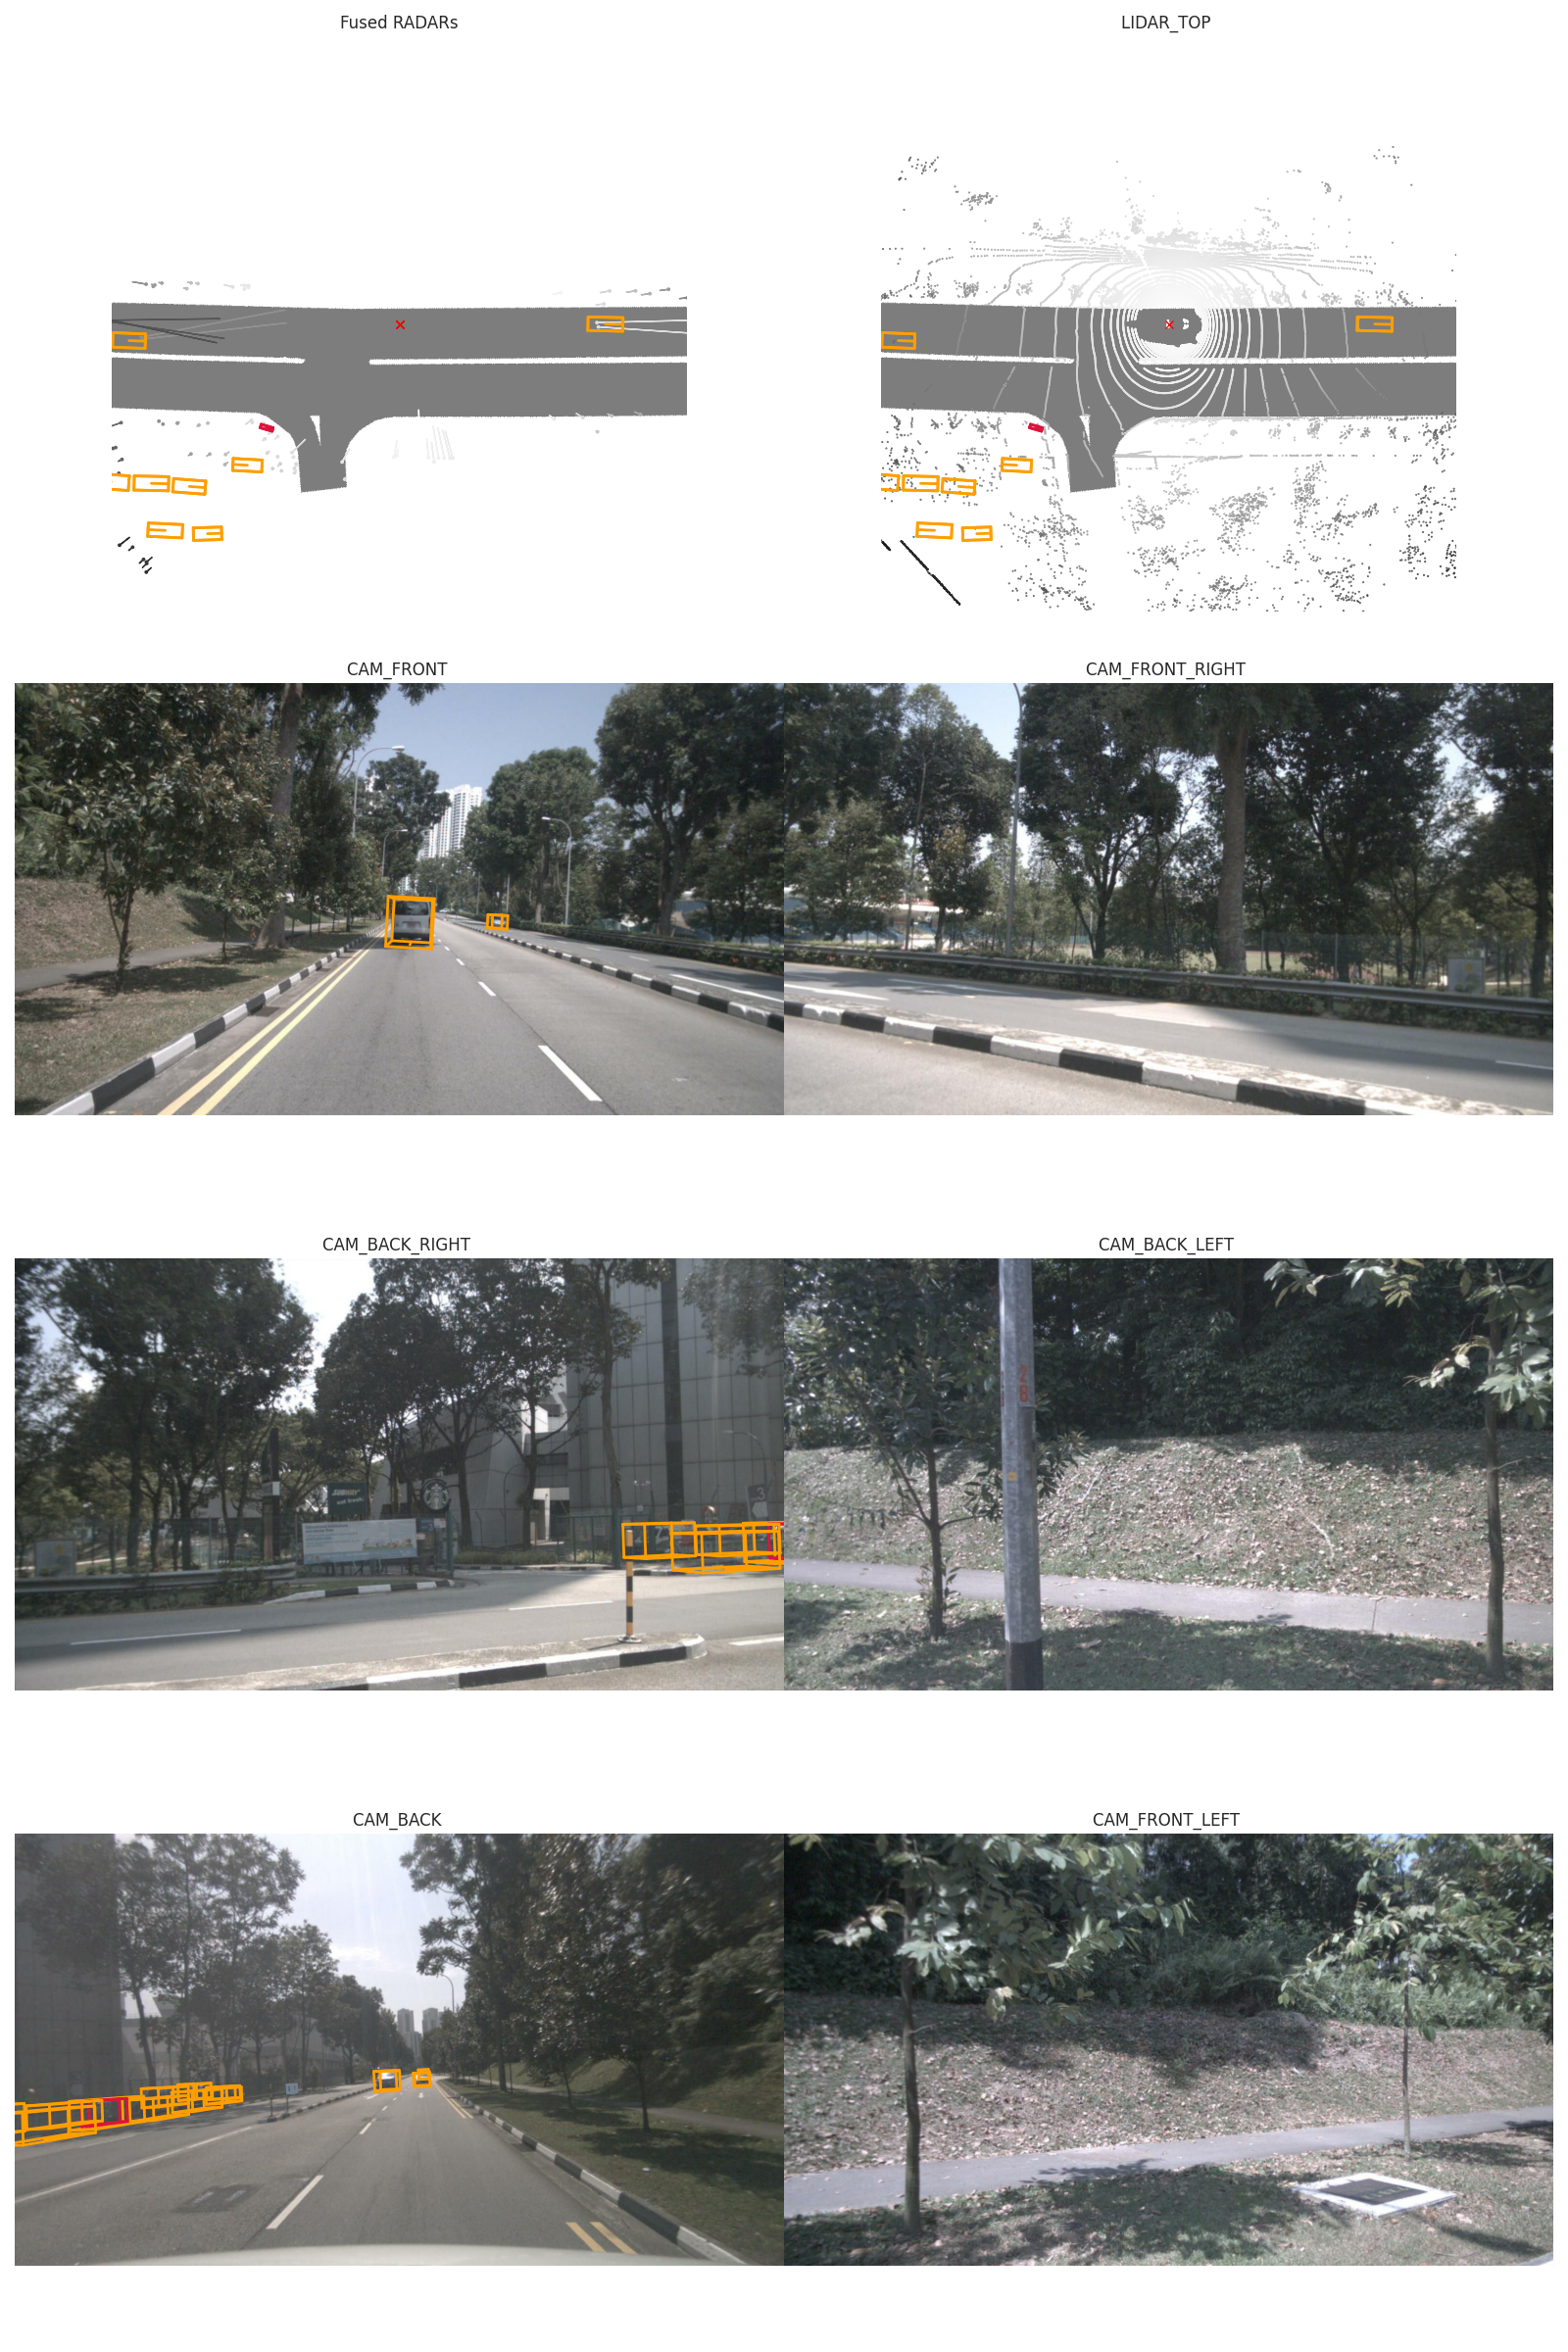

LIDAR predictions:


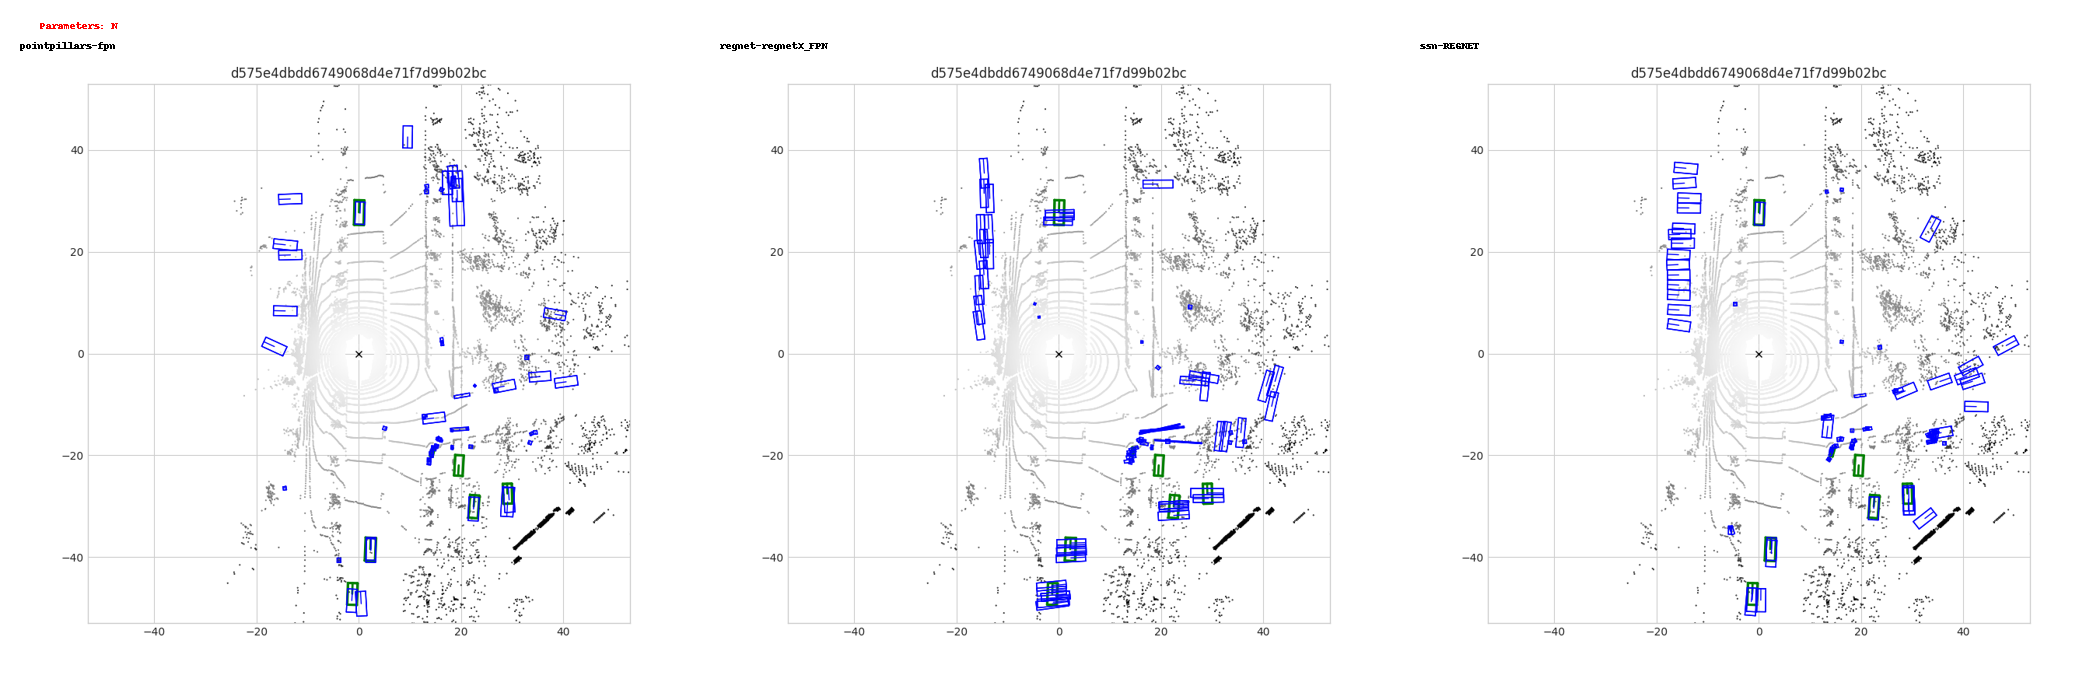

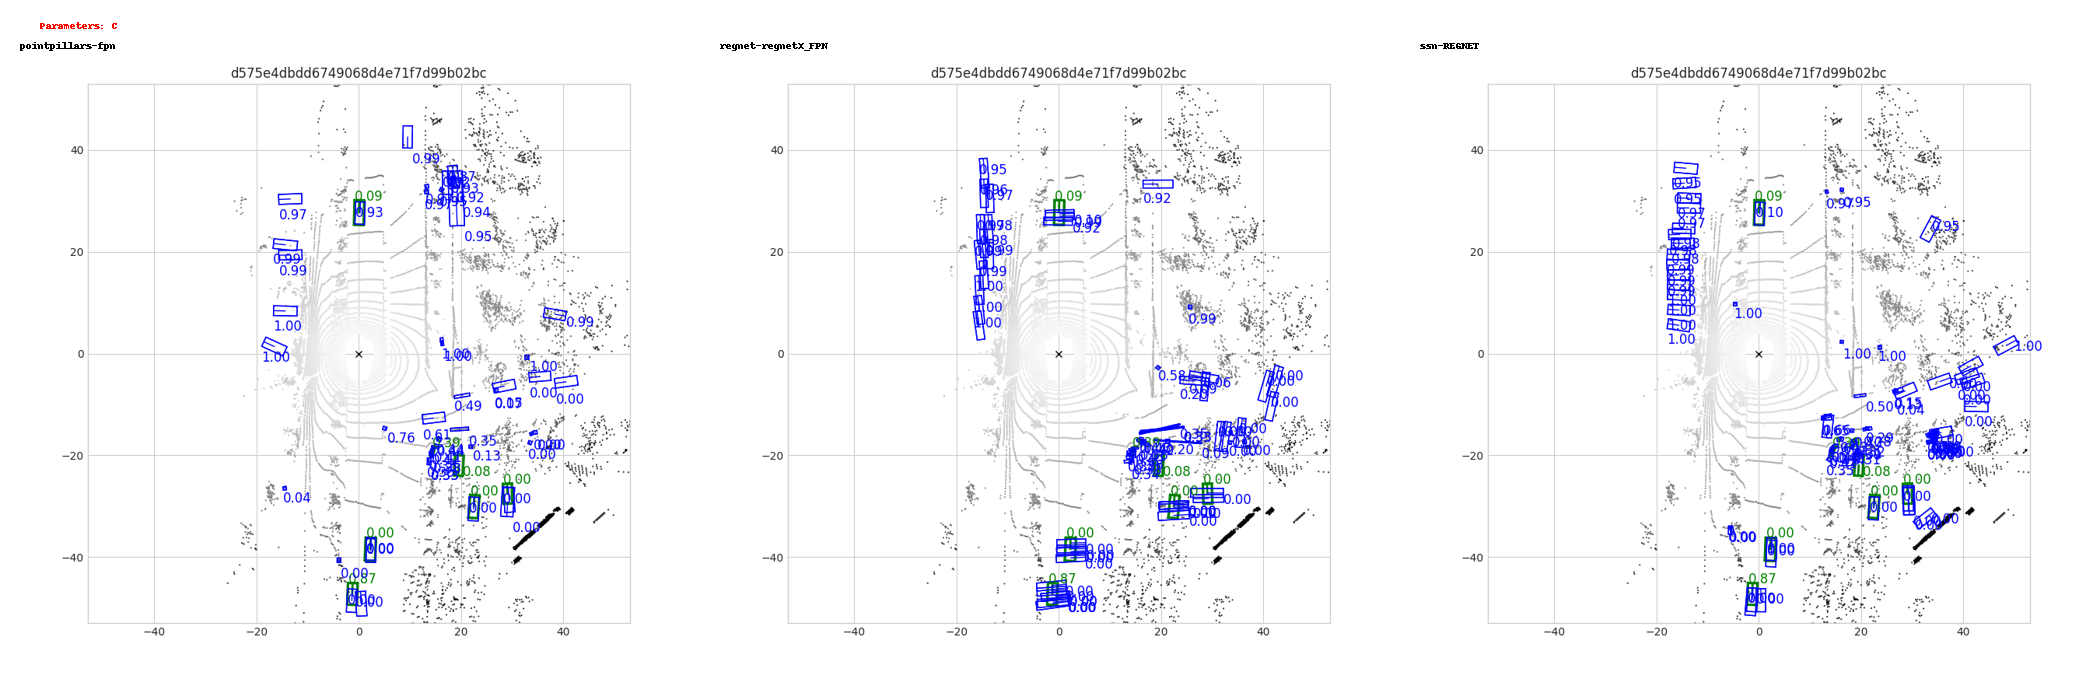

In [16]:
from IPython.display import display

print("Sample:")
display(Image.open(data_loc[0]+sample_tokens[idx]+'/SENSOR_ANN_VIZ.png'))

size=(1000,1000)
print("LIDAR predictions:")
display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'N', size=(700,700)))
display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'C', size=(700,700)))
#display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'D'))
#display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'T'))
#display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'R'))


In [17]:
print("AP and PR summaries:")

# Display top level metrics: mAP, nd_score(nuScenes detection score) mAP_crit and PKL
for l in range(len(data_loc)):
    with open(os.path.join(data_loc[l]+sample_tokens[idx], 'metrics_summary.json'), 'r') as f:
        summary = json.load(f)
        det = data_loc[l].split('/')[len(data_loc[l].split('/'))-3]
        print("Detector: {}".format(det))
        print("mAP: {}, nd_Score: {}, mAP_crit: {}".format(summary['mean_ap'], summary['nd_score'], summary['mean_ap_crit']))
    with open(os.path.join(data_root, detectors[l], 'pkl_results.json'), 'r') as f:
        print("PKL: {}".format(json.load(f)['full'][sample_tokens[idx]])) # print sample PKL

AP and PR summaries:
Detector: pointpillars-fpn
mAP: 0.05997844405251812, nd_Score: 0.49998922202625906, mAP_crit: nan
PKL: 8.187287330627441
Detector: regnet-regnetX_FPN
mAP: 0.16803270803270806, nd_Score: 0.5540163540163541, mAP_crit: 0.08333333333333334
PKL: 6.266781330108643
Detector: ssn-REGNET
mAP: 0.08117283950617286, nd_Score: 0.5105864197530865, mAP_crit: 0.004988433396450267
PKL: 7.222658157348633


In [18]:
# Read tables into dataframes
dfs_ap = [pd.read_csv(path + sample_tokens[idx] + '/AP_summary.txt', 
                   delimiter=";") for path in data_loc]

        #i["AP"]=pd.to_numeric(df["AP"])
        #i["AP_crit"]=pd.to_numeric(df["AP_crit"])

for i in range(len(dfs_ap)):
    print("Detector: {}".format(detectors[i]))
    display(dfs_ap[i])
    
dfs_pr = [pd.read_csv(path + sample_tokens[idx] + '/PR_summary.txt', 
                   delimiter=";", names=[]) for path in data_loc]
for i in range(len(dfs_ap)):
    print("Detector: {}".format(detectors[i]))
    display(dfs_pr[i])
#visualize_table([d+sample_tokens[idx]+'/PR_summary.txt' for d in data_loc])
#visualize_table([d+sample_tokens[idx]+'/AP_summary.txt' for d in data_loc])

Detector: pointpillars-fpn/


Model            class_name  dist_th        AP   AP_crit
0  pointpillars-fpn                   car      2.0  0.499167       NaN
1  pointpillars-fpn                 truck      2.0  0.000000  0.000000
2  pointpillars-fpn                   bus      2.0  0.000000  0.000000
3  pointpillars-fpn               trailer      2.0  0.000000  0.000000
4  pointpillars-fpn  construction_vehicle      2.0  0.000000  0.000000
5  pointpillars-fpn            pedestrian      2.0  0.000000  0.000000
6  pointpillars-fpn            motorcycle      2.0  0.000000  0.000000
7  pointpillars-fpn               bicycle      2.0  0.100617  0.034088
8  pointpillars-fpn          traffic_cone      2.0  0.000000  0.000000
9  pointpillars-fpn               barrier      2.0  0.000000  0.000000

Detector: regnet-regnetX_FPN/


Model            class_name  dist_th        AP   AP_crit
0  regnet-regnetX_FPN                   car      2.0  0.690909  0.000000
1  regnet-regnetX_FPN                 truck      2.0  0.000000  0.000000
2  regnet-regnetX_FPN                   bus      2.0  0.000000  0.000000
3  regnet-regnetX_FPN               trailer      2.0  0.000000  0.000000
4  regnet-regnetX_FPN  construction_vehicle      2.0  0.000000  0.000000
5  regnet-regnetX_FPN            pedestrian      2.0  0.000000  0.000000
6  regnet-regnetX_FPN            motorcycle      2.0  0.000000  0.000000
7  regnet-regnetX_FPN               bicycle      2.0  0.989418  0.833333
8  regnet-regnetX_FPN          traffic_cone      2.0  0.000000  0.000000
9  regnet-regnetX_FPN               barrier      2.0  0.000000  0.000000

Detector: ssn-REGNET/


Model            class_name  dist_th                     AP  \
0   ssn-REGNET                   car      2.0     0.8111111111111113   
1   ssn-REGNET                 truck      2.0                    0.0   
2   ssn-REGNET                   bus      2.0                    0.0   
3   ssn-REGNET               trailer      2.0                    0.0   
4   ssn-REGNET  construction_vehicle      2.0                    0.0   
5   ssn-REGNET            pedestrian      2.0                    0.0   
6   ssn-REGNET            motorcycle      2.0                    0.0   
7   ssn-REGNET               bicycle      2.0  0.0006172839506172827   
8   ssn-REGNET          traffic_cone      2.0                    0.0   
9   ssn-REGNET               barrier      2.0                    0.0   
10       Model            class_name  dist_th                     AP   
11  ssn-REGNET                   car      2.0     0.8111111111111113   
12  ssn-REGNET                 truck      2.0                    0.0   
13  ssn-REGNET                   bus      2.0                    0.0   
14  ssn-REGNET               trailer      2.0                    0.0   
15  ssn-REGNET  construction_vehicle      2.0                    0.0   
16  ssn-REGNET            pedestrian      2.0                    0.0   
17  ssn-REGNET            motorcycle      2.0                    0.0   
18  ssn-REGNET               bicycle      2.0  0.0006172839506172827   
19  ssn-REGNET          traffic_cone      2.0                    0.0   
20  ssn-REGNET               barrier      2.0                    0.0   

                 AP_crit  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
5                    0.0  
6                    0.0  
7   0.049884333964502675  
8                    0.0  
9                    0.0  
10               AP_crit  
11                   0.0  
12                   0.0  
13                   0.0  
14                   0.0  
15                   0.0  
16                   0.0  
17                   0.0  
18  0.049884333964502675  
19                   0.0  
20                   0.0

Detector: pointpillars-fpn/


Empty DataFrame
Columns: []
Index: [(Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (pointpillars-fpn, car, 2.0, 5.0, 15.0, 1.0, 0.9317460262713074, 0.954456513407914, 10.3370772046406, 0.09898348469148999, 0.25, 0.8333333333333334, 0.08469886285816523, 0.9039675456667287), (Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (pointpillars-fpn, bicycle, 2.0, 1.0, 4.0, 0.0, 0.3310837803746568, 0.39108028443609477, 2.7530504242616356, 0.05999650406143797, 0.2, 1.0, 0.12680391269880367, 0.8465877558927627)]

Detector: regnet-regnetX_FPN/


Empty DataFrame
Columns: []
Index: [(Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (regnet-regnetX_FPN, car, 2.0, 5.0, 30.0, 1.0, 0.10325208243667328, 0.954456513407914, 13.961917823335586, 0.9274774285261241, 0.14285714285714285, 0.8333333333333334, 0.0678595793582423, 0.10017379083308307), (Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (regnet-regnetX_FPN, bicycle, 2.0, 1.0, 6.0, 0.0, 0.3339288535500844, 0.39108028443609477, 2.343852558856998, 0.05715143088601038, 0.14285714285714285, 1.0, 0.14604638101679446, 0.8538626641114931)]

Detector: ssn-REGNET/


Empty DataFrame
Columns: []
Index: [(Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (ssn-REGNET, car, 2.0, 5.0, 26.0, 1.0, 0.10262305302331942, 0.954456513407914, 16.325956215426036, 0.928106457939478, 0.16129032258064516, 0.8333333333333334, 0.05809732526542463, 0.0995635149006842), (Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (ssn-REGNET, bicycle, 2.0, 1.0, 10.0, 0.0, 0.40158030930537447, 0.39108028443609477, 1.2464948305212766, -0.0105000248692797, 0.09090909090909091, 1.0, 0.2372951784693686, 1.0), (Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (ssn-REGNET, car, 2.0, 5.0, 26.0, 1.0, 0.10262305302331942, 0.954456513407914, 16.325956215426036, 0.928106457939478, 0.16129032258064516, 0.8333333333333334, 0.05809732526542463, 0.0995635149006842), (Model, Class, dist_th, TPs, FPs, FNs, TPs_pred_crit, TPs_gt_crit, FPs_pred_crit, FNs_gt_crit, Prec, Rec, Prec_crit, Rec_crit), (ssn-REGNET, bicycle, 2.0, 1.0, 10.0, 0.0, 0.40158030930537447, 0.39108028443609477, 1.2464948305212766, -0.0105000248692797, 0.09090909090909091, 1.0, 0.2372951784693686, 1.0)]

# 